Introduction to the NYC Taxi Trip Dataset:

The NYC Taxi and Limousine Commission dataset is a comprehensive collection of taxi trip data in New York City. It includes essential information such as pickup time, geographical coordinates, number of passengers, and various other relevant variables. This dataset serves as a valuable resource for analyzing travel patterns, optimizing taxi services, and understanding the factors that influence ride durations.

Project Purpose:
The primary objective of this project is to build a predictive model that accurately estimates the total ride duration of taxi trips in New York City. By leveraging machine learning techniques, we aim to create a model that can assist taxi services in estimating trip durations more effectively. This is essential for improving service efficiency, managing resources, and providing better experiences for passengers.

In [451]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [452]:
tr=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

data preprocessing of train dataset

In [453]:
tr.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [454]:
tr.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [455]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [456]:
tr.isnull().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

In [457]:
tr.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [458]:
tr.dropna(inplace=True)

In [459]:
tr.isnull().any()

id                    False
vendor_id             False
pickup_datetime       False
dropoff_datetime      False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
trip_duration         False
dtype: bool

In [460]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
tr['store_and_fwd_flag'] = label_encoder.fit_transform(tr['store_and_fwd_flag'])
test['store_and_fwd_flag'] = label_encoder.fit_transform(test['store_and_fwd_flag'])

In [461]:
# Assuming your datetime column is named 'pickup_datetime'
tr['pickup_datetime'] = pd.to_datetime(tr['pickup_datetime'])
tr['pickup_year'] = tr['pickup_datetime'].dt.year
tr['pickup_month'] = tr['pickup_datetime'].dt.month
tr['pickup_day'] = tr['pickup_datetime'].dt.day
tr['pickup_hour'] = tr['pickup_datetime'].dt.hour
tr['pickup_minute'] = tr['pickup_datetime'].dt.minute
tr['pickup_second'] = tr['pickup_datetime'].dt.second

# tr['dropoff_datetime'] = pd.to_datetime(tr['dropoff_datetime'])
# tr['dropoff_year'] = tr['dropoff_datetime'].dt.year
# tr['dropoff_month'] = tr['dropoff_datetime'].dt.month
# tr['dropoff_day'] = tr['dropoff_datetime'].dt.day
# tr['dropoff_hour'] = tr['dropoff_datetime'].dt.hour
# tr['dropoff_minute'] = tr['dropoff_datetime'].dt.minute
# tr['dropoff_second'] = tr['dropoff_datetime'].dt.second

test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_year'] =test['pickup_datetime'].dt.year
test['pickup_month'] =test['pickup_datetime'].dt.month
test['pickup_day'] =test['pickup_datetime'].dt.day
test['pickup_hour'] =test['pickup_datetime'].dt.hour
test['pickup_minute'] =test['pickup_datetime'].dt.minute
test['pickup_second'] =test['pickup_datetime'].dt.second

# tr['dropoff_datetime'] = pd.to_datetime(tr['dropoff_datetime'])
# tr['dropoff_year'] = tr['dropoff_datetime'].dt.year
# tr['dropoff_month'] = tr['dropoff_datetime'].dt.month
# tr['dropoff_day'] = tr['dropoff_datetime'].dt.day
# tr['dropoff_hour'] = tr['dropoff_datetime'].dt.hour
# tr['dropoff_minute'] = tr['dropoff_datetime'].dt.minute
# tr['dropoff_second'] = tr['dropoff_datetime'].dt.second

In [462]:
tr.drop(['id','pickup_datetime','dropoff_datetime'],axis=1,inplace=True)

In [463]:
import datetime as dt
from geopy.distance import geodesic
import time

In [477]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # radius of the Earth in km
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    meters = R * c  # output distance in kilometers
    return meters

tr['distance'] = tr.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
test['distance'] = test.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)


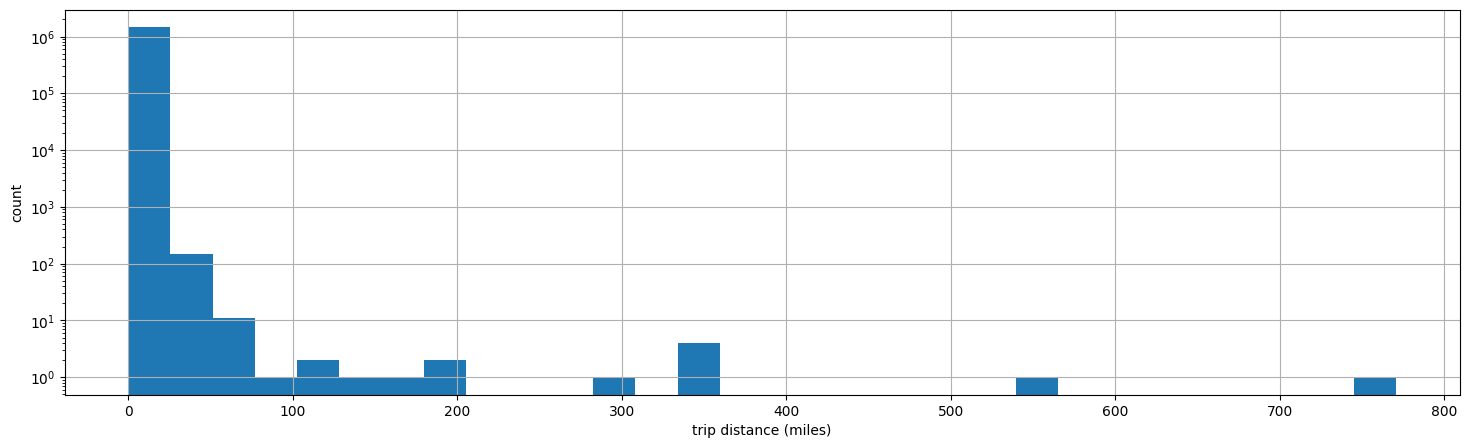

In [465]:
ax = tr['distance'].hist(bins=30, figsize=(18,5))
ax.set_yscale('log')
ax.set_xlabel("trip distance (miles)")
ax.set_ylabel("count")
plt.show()

In [478]:
tr['speed'] = (tr.distance/(tr.trip_duration/3600))
test['speed'] = (test.distance/(test.trip_duration/3600))

AttributeError: ignored

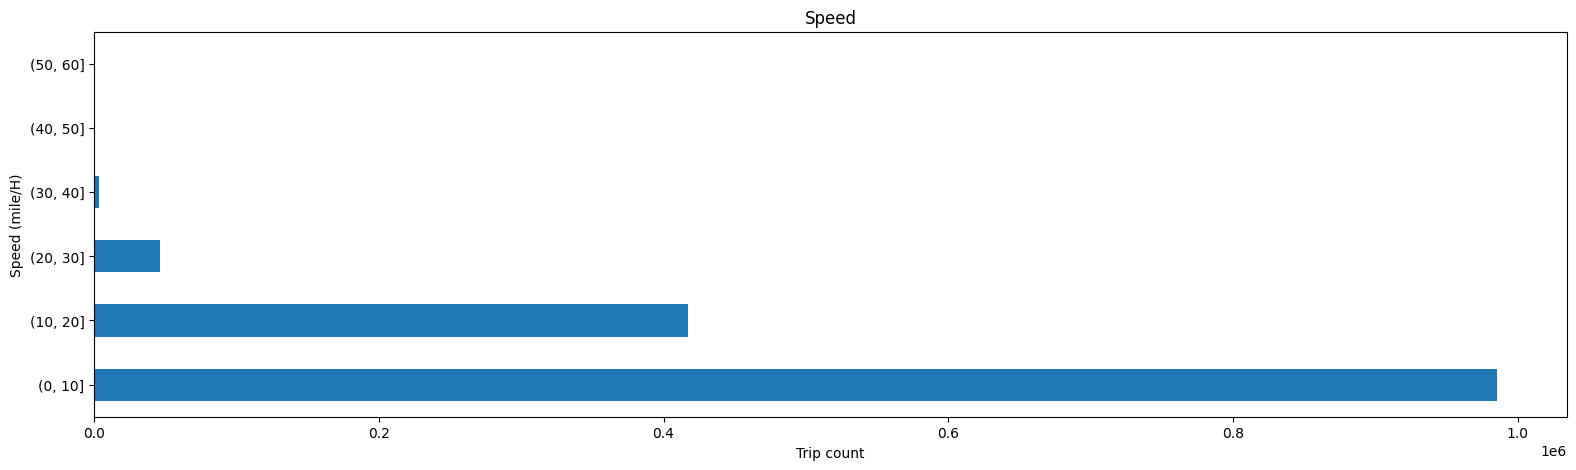

In [467]:
tr = tr[tr.speed <= 65]
tr.speed.groupby(pd.cut(tr.speed, np.arange(0,65,10))).count().plot(kind = 'barh',figsize = (19,5))
plt.xlabel('Trip count')
plt.ylabel('Speed (mile/H)')
plt.title('Speed')
plt.show()

In [468]:
tr.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,distance,speed
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016,3,14,17,24,55,0.933406,7.385193
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016,6,12,0,43,35,1.123849,6.102349
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016,1,19,11,35,24,3.964154,6.718905
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016,4,6,19,32,31,0.921886,7.736110
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016,3,26,13,30,55,0.737591,6.104201


In [469]:
tr.corr().trip_duration.sort_values(ascending=False)

trip_duration         1.000000
distance              0.102977
pickup_longitude      0.026760
vendor_id             0.020318
dropoff_longitude     0.015017
passenger_count       0.008471
pickup_month          0.006608
pickup_hour           0.003687
store_and_fwd_flag    0.001725
pickup_day            0.000568
pickup_second         0.000044
pickup_minute        -0.002340
dropoff_latitude     -0.021707
pickup_latitude      -0.031728
speed                -0.034772
pickup_year                NaN
Name: trip_duration, dtype: float64

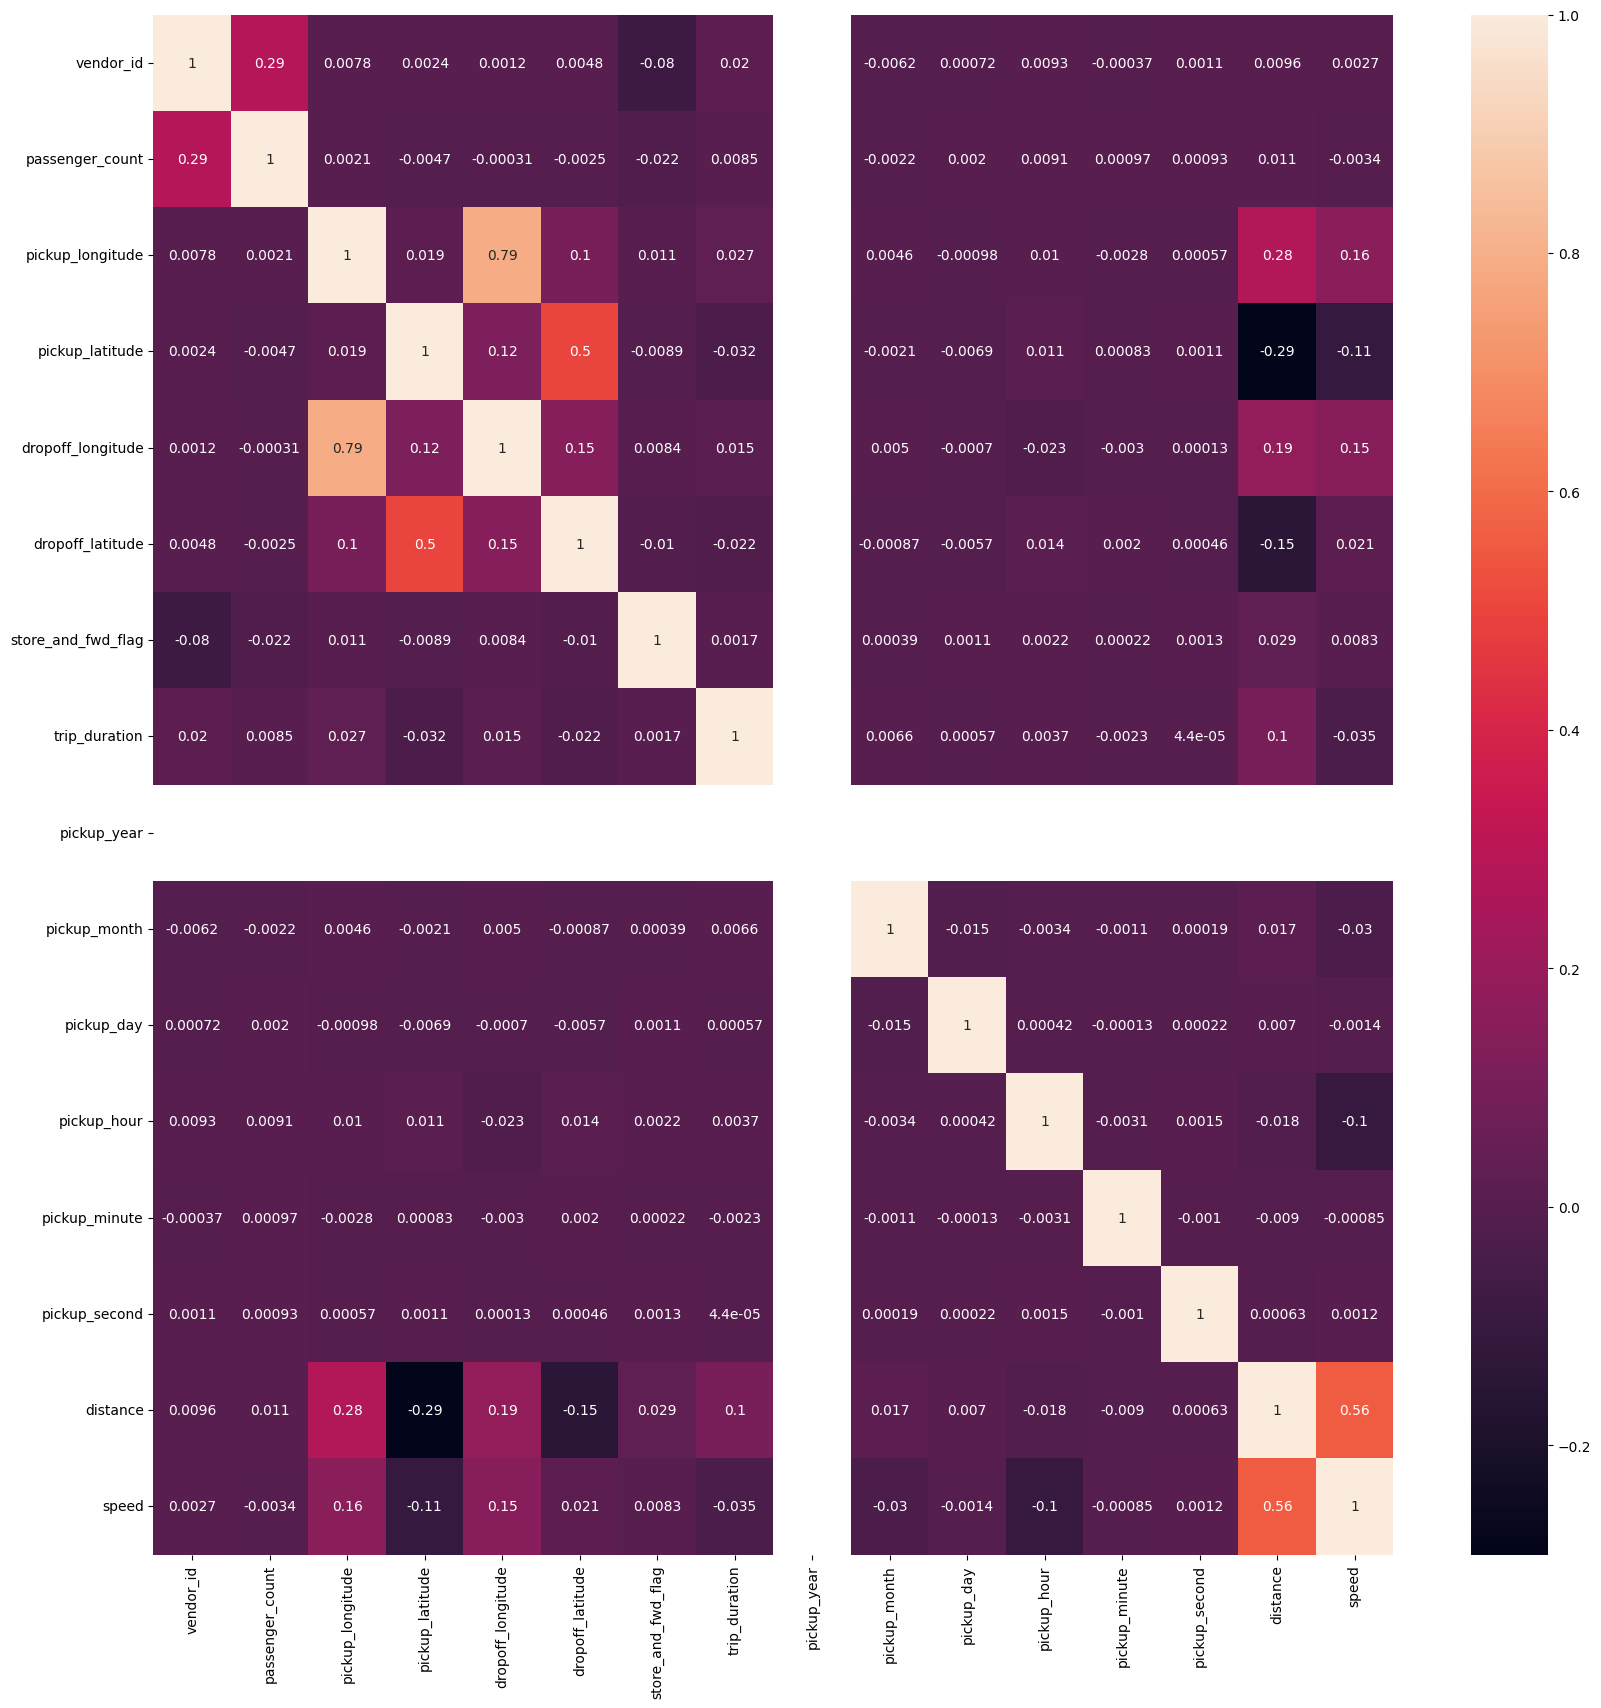

In [470]:
plt.figure(figsize=(20,20))
sns.heatmap(tr.corr(),annot=True)
plt.show()

In [471]:
# Identify and fix outliers using IQR method for all features
def fix_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
        df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    return df

# List of features for which you want to fix outliers
features_to_fix = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration','vendor_id','passenger_count','store_and_fwd_flag','distance','speed']

# Apply the fix_outliers_iqr function to the training data
tr = fix_outliers_iqr(tr, features_to_fix)
# Apply the fix_outliers_iqr function to the test data
test = fix_outliers_iqr(test, features_to_fix)


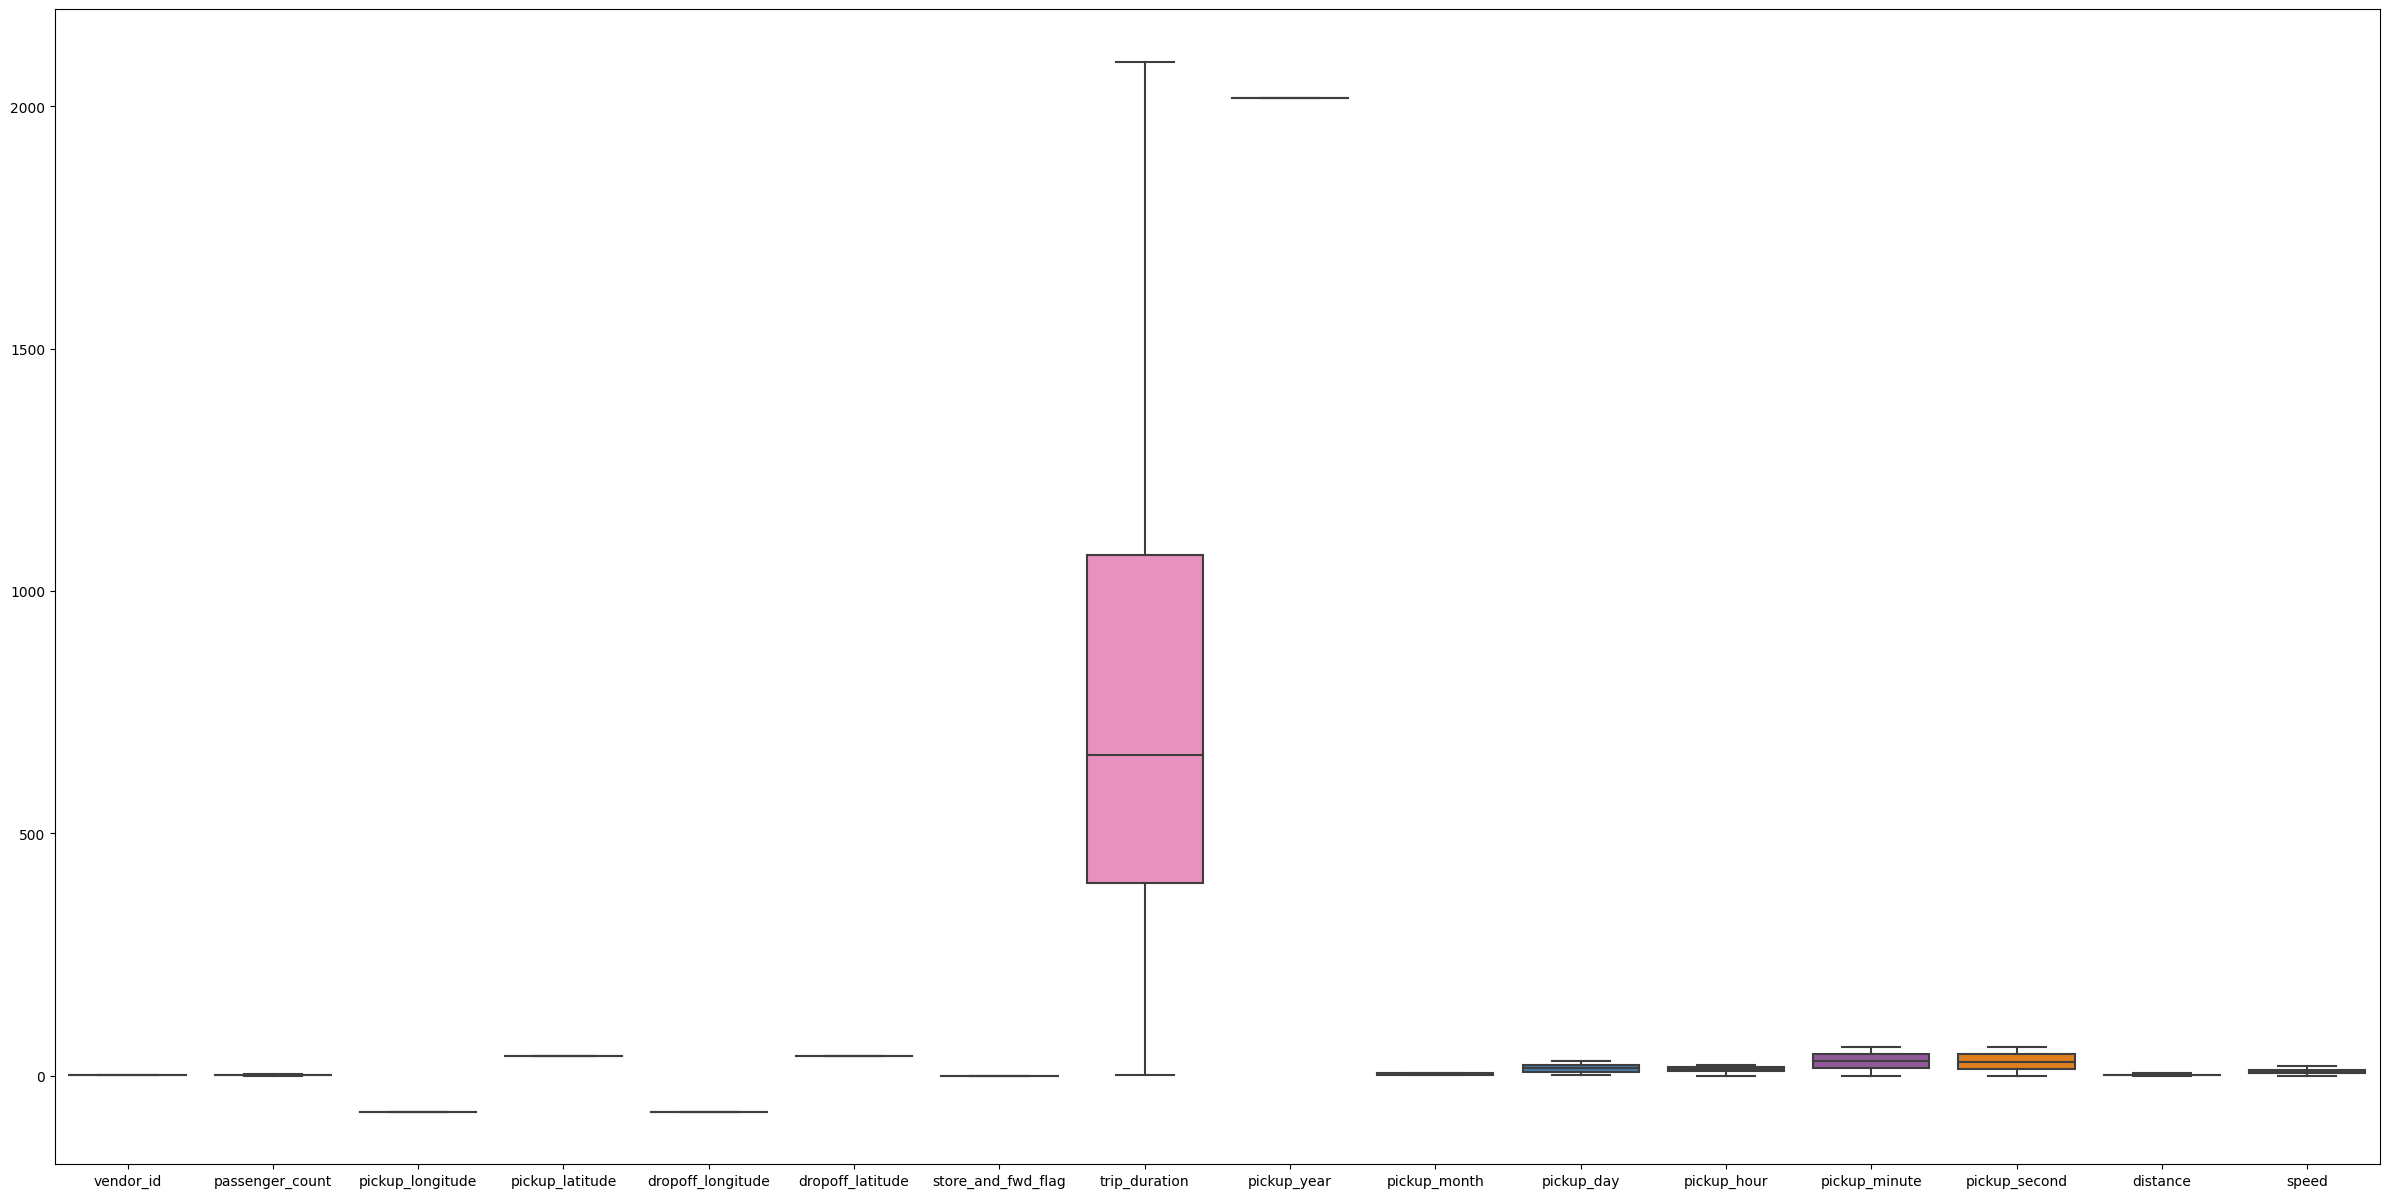

In [472]:
plt.figure(figsize=(30,15))
sns.boxplot(data=tr, palette="Set1")
plt.show()

In [473]:
test.isnull().any()

id                    False
vendor_id             False
pickup_datetime       False
passenger_count       False
pickup_longitude      False
pickup_latitude       False
dropoff_longitude     False
dropoff_latitude      False
store_and_fwd_flag    False
pickup_year           False
pickup_month          False
pickup_day            False
pickup_hour           False
pickup_minute         False
pickup_second         False
dtype: bool

Feature Scaling

In [474]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016,6,30,23,59,58
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016,6,30,23,59,53
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016,6,30,23,59,47
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016,6,30,23,59,41
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016,6,30,23,59,33


In [475]:
test.drop(['id'],axis=1,inplace=True)

In [479]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tr)

In [495]:
selected_features = ['passenger_count', 'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute','distance','speed']
# Split data into features (X) and target variable (y)
X = tr[selected_features]
y = tr['trip_duration']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data into training andteststing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = LinearRegression()  # You can use other regression models as well
model.fit(X_train, y_train)
pred = model.predict(X_test)


In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R²)
r2 = r2_score(y_test, pred)
print("R-squared (R²):", r2)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

In [ ]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

In [ ]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [ ]:
from math import sqrt

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

r2_train = r2_score(y_train, y_train_pred)

print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", rmse_train)
print("R-squared: ", r2_train)

In [496]:
from sklearn.tree import DecisionTreeRegressor

dt_regression = DecisionTreeRegressor()
dt_regression = dt_regression.fit(X_train, y_train)

In [497]:
trips = dt_regression.predict(X_test)

In [498]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,distance
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016,6,30,23,59,58,2.746426
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016,6,30,23,59,53,2.759239
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016,6,30,23,59,47,1.306155
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016,6,30,23,59,41,5.269088
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016,6,30,23,59,33,0.960842


In [499]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': trips})
predictions

,Actual,Predicted
1404822,822.0,821.0
152847,95.0,96.0
429387,402.0,402.0
1415324,2092.0,2092.0
831900,1076.0,1073.0
...,...,...
430613,464.0,465.0
390336,954.0,952.0
112746,876.0,876.0
1199398,820.0,823.0


In [500]:
mse_train = mean_squared_error(y_test, trips)
rmse_train = np.sqrt(mse_train)

r2_train = r2_score(y_test, trips)

print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", rmse_train)
print("R-squared: ", r2_train)

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  36.24811539922089
R-squared:  0.9952982721783878
